<a href="https://colab.research.google.com/github/Abhi-945/Stat-Tricks/blob/H1003W03T06%23Cluster-Champs/week_5_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
data = pd.read_excel("/content/drive/MyDrive/Week 5 Data.xlsx",index_col=0 , skiprows=1 , usecols=range(26))
data.head()

,M,T,W,TH,F,M.1,T.1,W.1,TH.1,F.1,M.2,T.2,W.2,TH.2,F.2,M.3,T.3,W.3,TH.3,F.3,M.4,T.4,W.4,TH.4,F.4
Days,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,6,7,1,2,3,4,5,3,4,5,6,7,4,5,6,7,7,5.0,6.0,7.0,7.0,7.0
2,1,2,3,4,5,5,5,6,6,7,3,4,5,6,7,6,6,7,7,7,3.0,4.0,5.0,6.0,7.0
3,3,4,5,6,7,2,3,4,5,6,5,6,6,7,7,2,3,4,5,6,NaN,4.0,5.0,6.0,7.0
4,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,4,5,6,7,7,4.0,NaN,6.0,NaN,7.0
5,2,3,4,5,6,5,5,6,6,7,5,6,6,7,7,4,5,6,7,7,3.0,4.0,5.0,6.0,NaN


In [43]:
data.columns=('M1','T1','W1','TH1','F1','M2','T2','W2','TH2','F2','M3','T3','W3','TH3','F3','M4','T4','W4','TH4','F4','M5','T5','W5','TH5','F5' )
data.head()


,M1,T1,W1,TH1,F1,M2,T2,W2,TH2,F2,M3,T3,W3,TH3,F3,M4,T4,W4,TH4,F4,M5,T5,W5,TH5,F5
Days,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,6,7,1,2,3,4,5,3,4,5,6,7,4,5,6,7,7,5.0,6.0,7.0,7.0,7.0
2,1,2,3,4,5,5,5,6,6,7,3,4,5,6,7,6,6,7,7,7,3.0,4.0,5.0,6.0,7.0
3,3,4,5,6,7,2,3,4,5,6,5,6,6,7,7,2,3,4,5,6,NaN,4.0,5.0,6.0,7.0
4,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,4,5,6,7,7,4.0,NaN,6.0,NaN,7.0
5,2,3,4,5,6,5,5,6,6,7,5,6,6,7,7,4,5,6,7,7,3.0,4.0,5.0,6.0,NaN


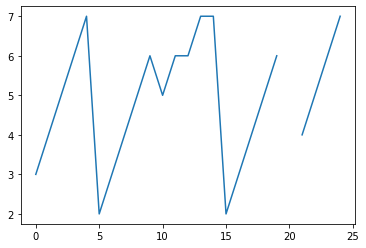

In [44]:
plt.plot(np.arange(len(data.loc[3])), data.loc[3])

In [45]:
from sklearn.linear_model import LinearRegression 
reg = data

In [46]:
data.shape

(1000, 25)

In [47]:
data.describe()

,M1,T1,W1,TH1,F1,M2,T2,W2,TH2,F2,M3,T3,W3,TH3,F3,M4,T4,W4,TH4,F4,M5,T5,W5,TH5,F5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,797.000000,826.000000,867.000000,848.000000,848.000000
mean,3.075000,3.739000,4.258000,5.133000,6.011000,2.931000,3.634000,4.512000,5.080000,5.950000,3.10600,3.986000,4.68200,5.562000,6.088000,3.486000,4.22100,5.097000,5.707000,6.161000,3.441656,4.317191,5.095732,5.659198,6.108491
std,1.424572,1.230607,0.972822,1.083737,1.215877,1.436071,1.236759,1.295196,1.061474,1.207045,1.39668,1.426127,1.26193,1.354988,1.188136,1.720105,1.57564,1.638376,1.444035,1.218427,1.737315,1.776239,1.625807,1.439249,1.233160
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,4.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.000000,5.000000,2.00000,3.000000,4.00000,5.000000,5.000000,2.000000,3.00000,4.000000,4.000000,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
50%,3.000000,4.000000,5.000000,6.000000,6.000000,3.000000,4.000000,5.000000,5.000000,6.000000,3.00000,4.000000,5.00000,6.000000,7.000000,4.000000,4.00000,5.000000,6.000000,7.000000,3.000000,4.000000,5.000000,6.000000,7.000000
75%,4.000000,5.000000,5.000000,6.000000,7.000000,4.000000,5.000000,6.000000,6.000000,7.000000,4.00000,5.000000,6.00000,7.000000,7.000000,5.000000,6.00000,7.000000,7.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000
max,5.000000,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,6.000000,6.000000,7.000000,5.00000,6.000000,6.00000,7.000000,7.000000,6.000000,6.00000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000


In [48]:
data.isnull().sum()

M1       0
T1       0
W1       0
TH1      0
F1       0
M2       0
T2       0
W2       0
TH2      0
F2       0
M3       0
T3       0
W3       0
TH3      0
F3       0
M4       0
T4       0
W4       0
TH4      0
F4       0
M5     203
T5     174
W5     133
TH5    152
F5     152
dtype: int64

In [49]:
for j in ['M5','T5','W5','F5']:
  for i in data.loc[data[j].isnull() == True].index :
    s =(data.loc[i][j[0]+'1']+data.loc[i][j[0]+'2']+data.loc[i][j[0]+'3']+data.loc[i][j[0]+'4'])//4
    data.at[i,j[0]+'5'] = s

In [50]:
for i in data.loc[data['TH5'].isnull() == True].index :
    s =(data.loc[i]['TH'+'1']+data.loc[i]['TH'+'2']+data.loc[i]['TH'+'3']+data.loc[i]['TH'+'4'])//4
    data.at[i,'TH'+'5'] = s

In [51]:
data.head()

,M1,T1,W1,TH1,F1,M2,T2,W2,TH2,F2,M3,T3,W3,TH3,F3,M4,T4,W4,TH4,F4,M5,T5,W5,TH5,F5
Days,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,6,7,1,2,3,4,5,3,4,5,6,7,4,5,6,7,7,5.0,6.0,7.0,7.0,7.0
2,1,2,3,4,5,5,5,6,6,7,3,4,5,6,7,6,6,7,7,7,3.0,4.0,5.0,6.0,7.0
3,3,4,5,6,7,2,3,4,5,6,5,6,6,7,7,2,3,4,5,6,3.0,4.0,5.0,6.0,7.0
4,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,4,5,6,7,7,4.0,2.0,6.0,4.0,7.0
5,2,3,4,5,6,5,5,6,6,7,5,6,6,7,7,4,5,6,7,7,3.0,4.0,5.0,6.0,6.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

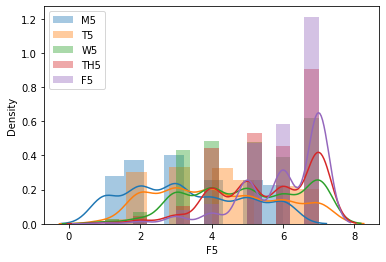

In [52]:
sns.distplot(data['M5'], label='M5')
sns.distplot(data['T5'],label='T5')
sns.distplot(data['W5'],label='W5')
sns.distplot(data['TH5'],label="TH5")
sns.distplot(data['F5'],label='F5')
plt.legend()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

dt_X, dt_y = datasets.load_M5(return_X_y=True)

AttributeError: ignored

In [ ]:

data.fillna(value = data.median())

,M1,T1,W1,TH1,F1,M2,T2,W2,TH2,F2,M3,T3,W3,TH3,F3,M4,T4,W4,TH4,F4,M5,T5,W5,TH5,F5
Days,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,6,7,1,2,3,4,5,3,4,5,6,7,4,5,6,7,7,5.0,6.0,7.0,7.0,7.0
2,1,2,3,4,5,5,5,6,6,7,3,4,5,6,7,6,6,7,7,7,3.0,4.0,5.0,6.0,7.0
3,3,4,5,6,7,2,3,4,5,6,5,6,6,7,7,2,3,4,5,6,3.0,4.0,5.0,6.0,7.0
4,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,4,5,6,7,7,4.0,2.0,6.0,4.0,7.0
5,2,3,4,5,6,5,5,6,6,7,5,6,6,7,7,4,5,6,7,7,3.0,4.0,5.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,3,4,5,5,1,2,3,3,3,5,6,6,6,6,6,6,6,7,7,1.0,1.0,4.0,3.0,4.0
997,5,5,5,5,7,2,2,3,4,5,1,1,2,2,3,5,5,5,6,7,3.0,7.0,3.0,7.0,7.0
998,1,1,1,2,3,4,4,4,5,5,4,4,4,5,5,5,5,5,5,5,5.0,5.0,5.0,6.0,6.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

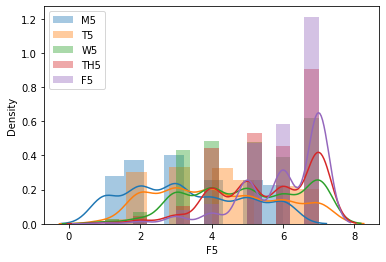

In [53]:
sns.distplot(data['M5'], label='M5')
sns.distplot(data['T5'],label='T5')
sns.distplot(data['W5'],label='W5')
sns.distplot(data['TH5'],label="TH5")
sns.distplot(data['F5'],label='F5')
plt.legend()

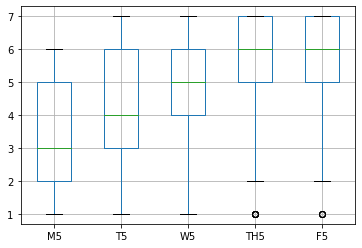

In [54]:
data[['M5' 	,'T5', 	'W5' ,	'TH5' 	,'F5']].boxplot()

In [55]:
data['M_mean'] = (data['M1'] + data['M2']+data['M3']+data['M4']+data['M5'])//5
data['T_mean'] = (data['T1'] + data['T2']+data['T3']+data['T4']+data['T5'])/5
data['W_mean'] = (data['W1'] + data['W2']+data['W3']+data['W4']+data['W5'])/5
data['TH_mean'] = (data['TH1'] + data['TH2']+data['TH3']+data['TH4']+ data['TH5'])/5
data['F_mean'] = (data['F1'] + data['F2']+data['F3']+data['F4']+data['F5'])/5 
data.head()


,M1,T1,W1,TH1,F1,M2,T2,W2,TH2,F2,M3,T3,W3,TH3,F3,M4,T4,W4,TH4,F4,M5,T5,W5,TH5,F5,M_mean,T_mean,W_mean,TH_mean,F_mean
Days,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,6,7,1,2,3,4,5,3,4,5,6,7,4,5,6,7,7,5.0,6.0,7.0,7.0,7.0,3.0,4.4,5.2,6.0,6.6
2,1,2,3,4,5,5,5,6,6,7,3,4,5,6,7,6,6,7,7,7,3.0,4.0,5.0,6.0,7.0,3.0,4.2,5.2,5.8,6.6
3,3,4,5,6,7,2,3,4,5,6,5,6,6,7,7,2,3,4,5,6,3.0,4.0,5.0,6.0,7.0,3.0,4.0,4.8,5.8,6.6
4,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,4,5,6,7,7,4.0,2.0,6.0,4.0,7.0,2.0,2.6,4.2,4.6,5.8
5,2,3,4,5,6,5,5,6,6,7,5,6,6,7,7,4,5,6,7,7,3.0,4.0,5.0,6.0,6.0,3.0,4.6,5.4,6.2,6.6


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


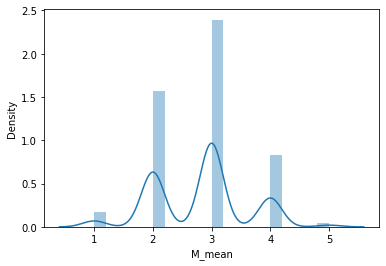

In [56]:
sns.distplot(data['M_mean'])

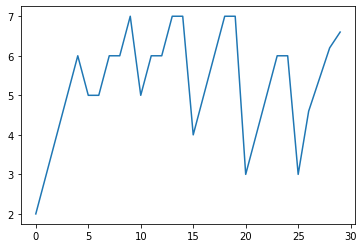

In [57]:
plt.plot(np.arange(len(data.loc[5])),data.loc[5])

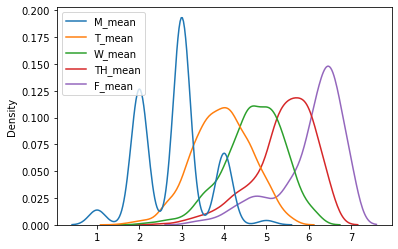

In [58]:
sns.kdeplot(data =data[['M_mean' 	,'T_mean', 	'W_mean' ,	'TH_mean' 	,'F_mean']])